In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("AirPassengers.csv")
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)
#data.head()

In [6]:
import plotly.plotly as ply
import cufflinks as cf

data.iplot(title="Exponential Smoothing Plot",color="blue")


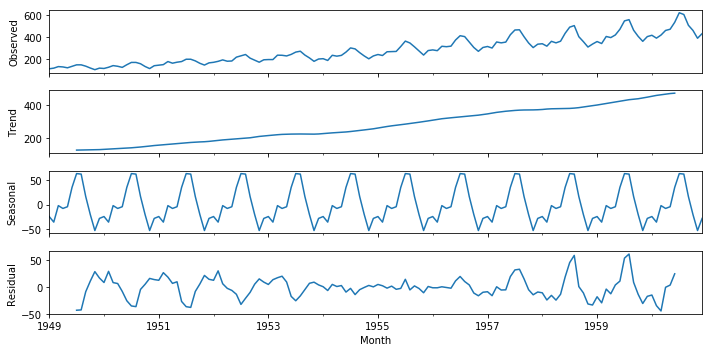

In [7]:
# Decomposition of time series into it's components
plt.rcParams['figure.figsize'] = [10, 5]
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

In [8]:
# Dividing the dataset into train and test set
df_train = data.iloc[:int(data.shape[0]*0.80),:]
df_test = data.iloc[int(data.shape[0]*0.80):,:]

RMSE of simple ETS is :  78.17664575150087


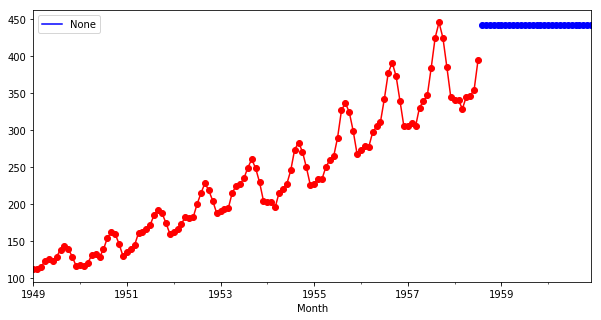

In [12]:
# Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import itertools

range1=np.arange(.0,1.0,0.1)

rmse_list=[]
model_list=[]
for i in range1:
    fit1 = SimpleExpSmoothing(df_train['#Passengers']).fit(smoothing_level=i,optimized=False)
    fcast = fit1.forecast(len(df_test))
    rmse=sqrt(mean_squared_error(df_test['#Passengers'].values,fcast.values))
    rmse_list.append(rmse)
    model_list.append(fit1)
       
# plot
j=np.where(min(np.asarray(rmse_list))==np.asarray(rmse_list))[0][0]

rmse_simple=rmse_list[j]
print("RMSE of simple ETS is : ",rmse_simple)
best_model = model_list[j]

best_fcast = best_model.forecast(len(df_test))
plt.plot(df_test,color="red")
best_fcast.plot(marker='o', color='blue', legend=True)
best_model.fittedvalues.plot(marker='o',  color='red')
plt.show()

RMSE of Holt ETS is :  70.56891036982803


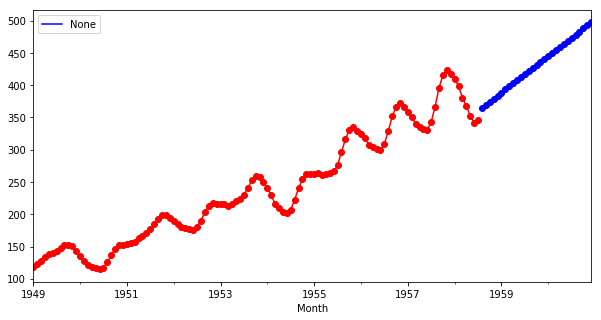

In [15]:
# Holt Test
rmse_list=[]
model_list=[]

for i, j in itertools.product(range1,range1):
    fit1 = Holt(df_train['#Passengers']).fit(smoothing_level=i, smoothing_slope=j, optimized=False)
    fcast1 = fit1.forecast(len(df_test)).rename("Holt's linear trend")
    rmse=sqrt(mean_squared_error(df_test['#Passengers'].values,fcast1.values))
    rmse_list.append(rmse)
    model_list.append(fit1)
       
# plot
j=np.where(min(np.asarray(rmse_list))==np.asarray(rmse_list))[0][0]

rmse_holt=rmse_list[j]
print("RMSE of Holt ETS is : ",rmse_holt)
best_model = model_list[j]

best_fcast = best_model.forecast(len(df_test))
plt.plot(df_test,color="red")
best_fcast.plot(marker='o', color='blue', legend=True)
best_model.fittedvalues.plot(marker='o',  color='red')
plt.show()

RMSE of Holt Winter's ETS is :  21.025619601765246


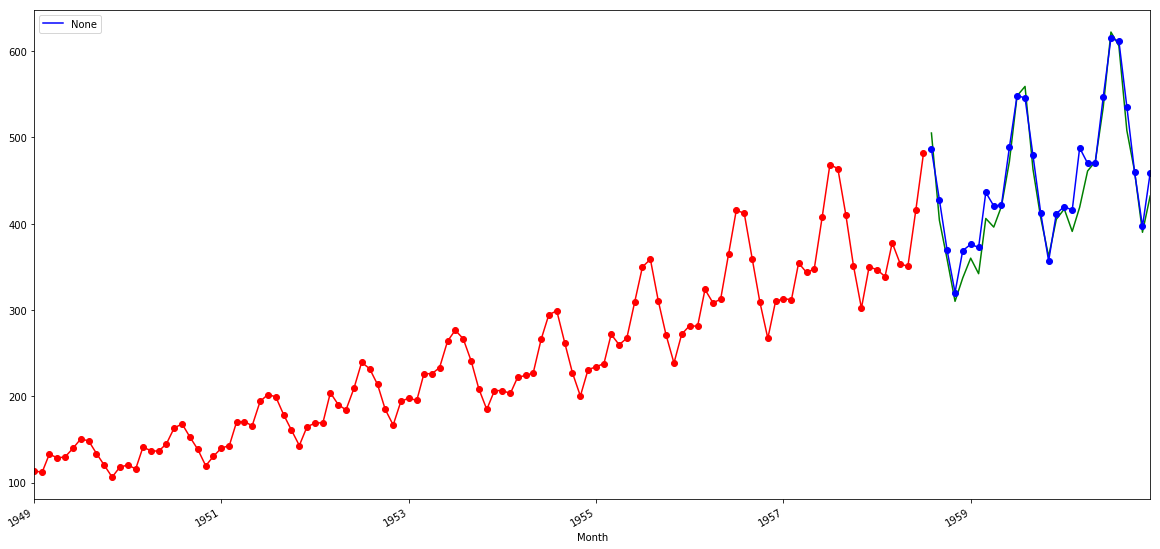

In [16]:
rmse_list=[]
model_list=[]
t=["add","mul"]
d=[True,False]
for trend in t:
    for seasonal in t:
        for damped in d:
            fit = ExponentialSmoothing(df_train["#Passengers"], seasonal_periods=12, trend=trend, seasonal=seasonal, damped=damped).fit(use_boxcox=True)
            fcast1 = fit.forecast(len(df_test)).rename("Holt Winter's Model")
            rmse=sqrt(mean_squared_error(df_test['#Passengers'].values,fcast1.values))
            rmse_list.append(rmse)
            model_list.append(fit)
       
# plot
j=np.where(min(np.asarray(rmse_list))==np.asarray(rmse_list))[0][0]

rmse_winter=rmse_list[j]
print("RMSE of Holt Winter's ETS is : ",rmse_winter)
best_model = model_list[j]

best_fcast = best_model.forecast(len(df_test))

plt.figure(figsize=(20,10))
plt.plot(df_test,color="red")
best_fcast.plot(marker='o', color='blue', legend=True)
best_model.fittedvalues.plot(marker='o',  color='red')
plt.show()

In [19]:
model_comparison=np.array((rmse_simple,rmse_holt,rmse_winter))
print("RMSE value: ",min(model_comparison))

RMSE value:  21.025619601765246
